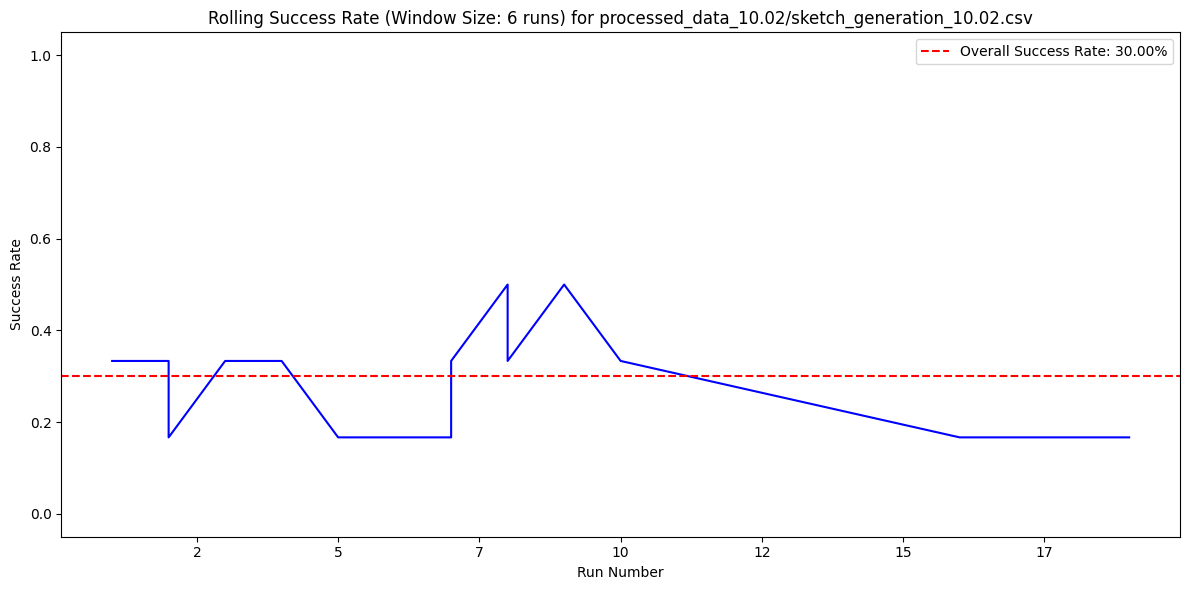

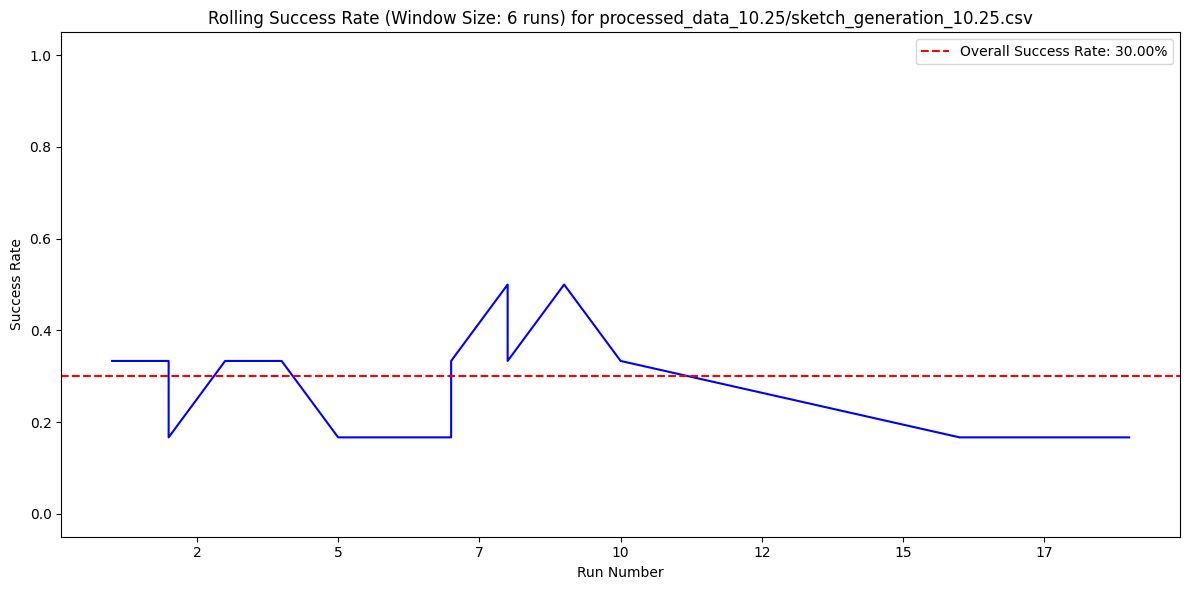

In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get all CSV files containing 'sketch' in their name from 'processed_data' directory
file_paths = glob.glob("processed_data_10.25/*sketch*.csv")

# Define the window size for rolling calculation
window_size = 6  # adjust this value based on your data

for file_path in file_paths:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Sort the DataFrame based on 'num_run'
    df = df.sort_values(by="num_run")

    # Convert status to binary (1 for success, 0 for error)
    df["success_binary"] = (df["pass"] == "yes").astype(int)

    # Calculate rolling success rate
    rolling_success_rate = df["success_binary"].rolling(window=window_size).mean()

    # Plot using num_run instead of start_time
    plt.figure(figsize=(12, 6))
    plt.plot(df["num_run"], rolling_success_rate, "b-")
    plt.axhline(
        y=df["success_binary"].mean(),
        color="r",
        linestyle="--",
        label=f'Overall Success Rate: {df["success_binary"].mean():.2%}',
    )

    plt.title(f"Rolling Success Rate (Window Size: {window_size} runs) for {file_path}")
    plt.xlabel("Run Number")
    plt.ylabel("Success Rate")
    plt.ylim(-0.05, 1.05)

    # Format x-axis to show integers
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: int(x)))

    plt.legend()
    plt.tight_layout()
    plt.show()